2) Build a prediction model for salary hike
and simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load the dataset
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA


In [5]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data.shape

(30, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Checking outliers by plotting the data 

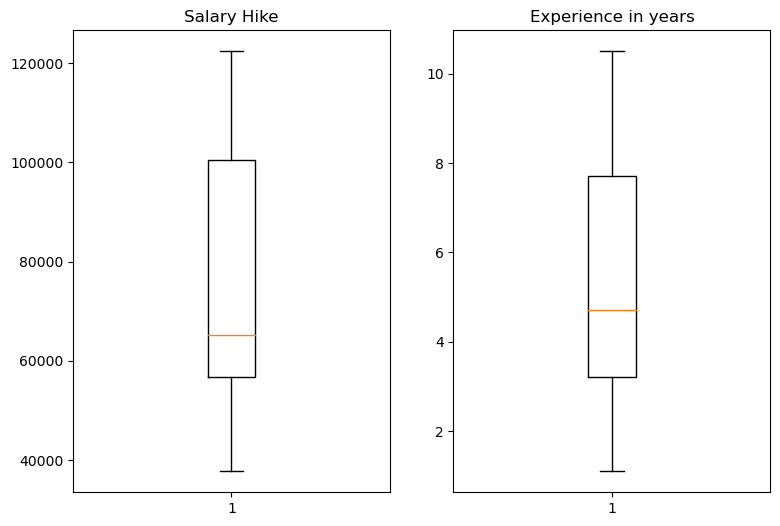

In [13]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Experience in years')
plt.show()

no outliers in the particular data 

# Analysing the Correlation 

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# correlation between variables 

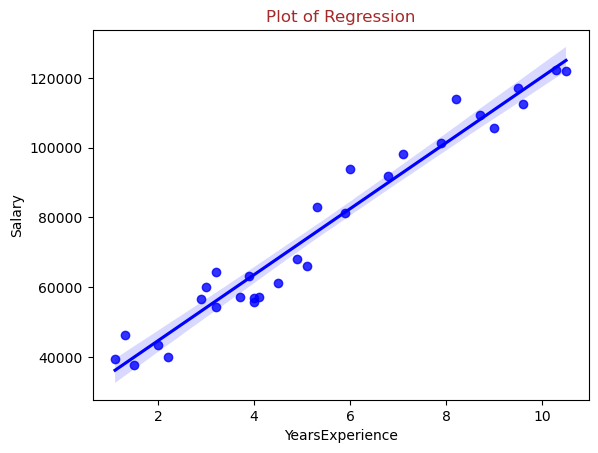

In [21]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'],color='blue')
plt.title('Plot of Regression',color='brown')
plt.show()

There is a good correlation between the two variables
Therefore the score is more than 0.8 which is good sign
# Data Visualisation

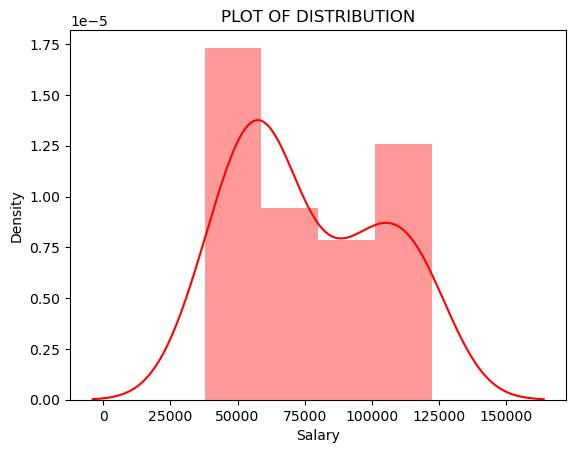

In [28]:
sns.distplot(data['Salary'],color='red')
plt.xlabel('Salary',color='black')
plt.ylabel('Density',color='black')
plt.title('PLOT OF DISTRIBUTION',color='black')
plt.show()

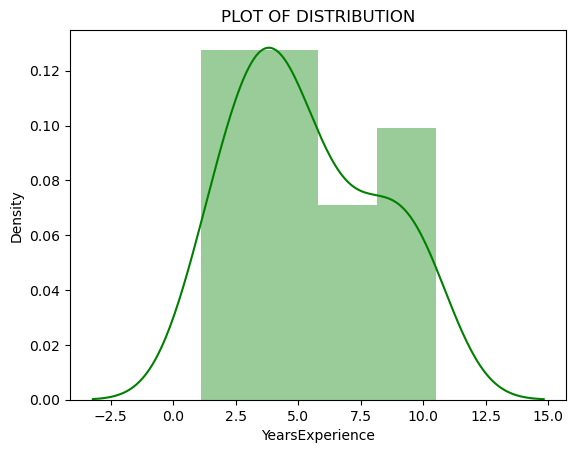

In [25]:
sns.distplot(data['YearsExperience'],color='green')
plt.xlabel('YearsExperience',color='black')
plt.ylabel('Density',color='black')
plt.title('PLOT OF DISTRIBUTION',color='black')
plt.show()

Trying different transformation of data to estimate normal distribution and to remove any skewness

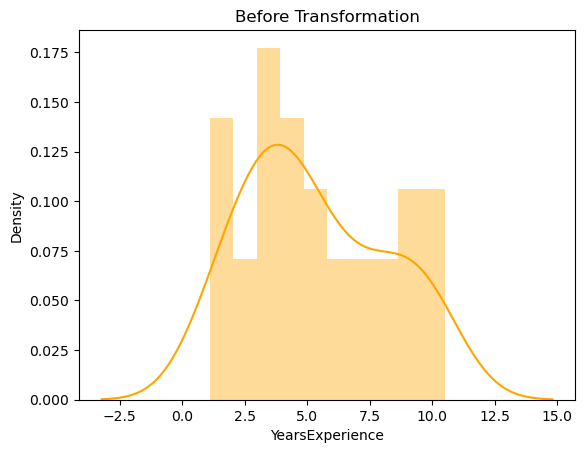

In [32]:
sns.distplot(data['YearsExperience'],bins=10,kde=True, color= "orange")
plt.title('Before Transformation')
plt.show()

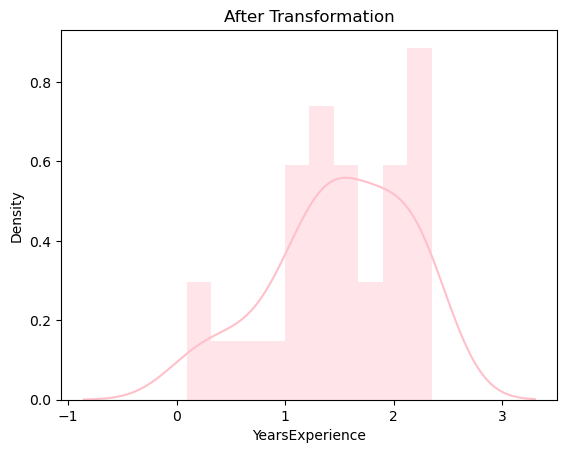

In [33]:
sns.distplot(np.log(data['YearsExperience']),bins=10,kde=True,color='pink')
plt.title('After Transformation')
plt.show()

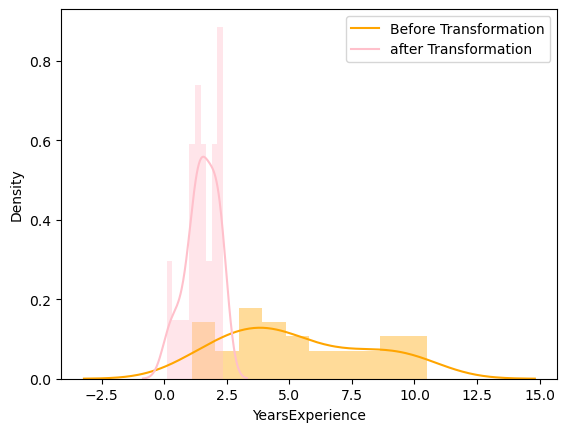

In [36]:
labels=['Before Transformation','after Transformation']
sns.distplot(data['YearsExperience'],bins=10,kde=True, color="orange")
sns.distplot(np.log(data['YearsExperience']),bins=10,kde=True,color="pink")
plt.legend(labels)
plt.show()

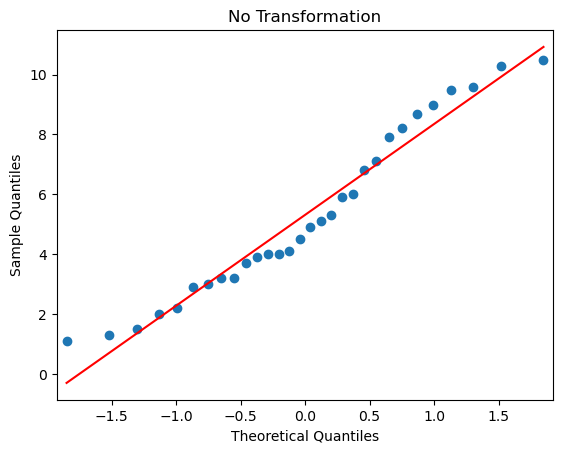

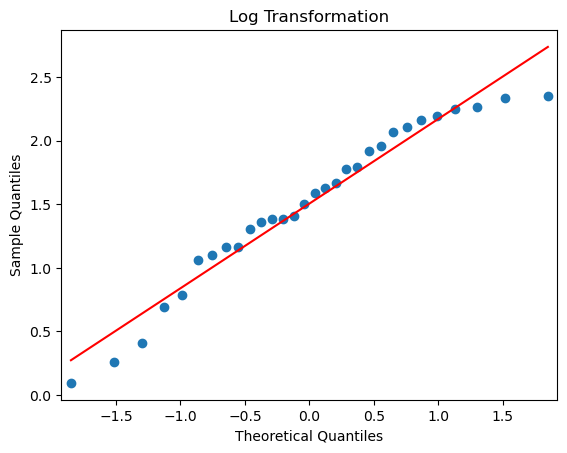

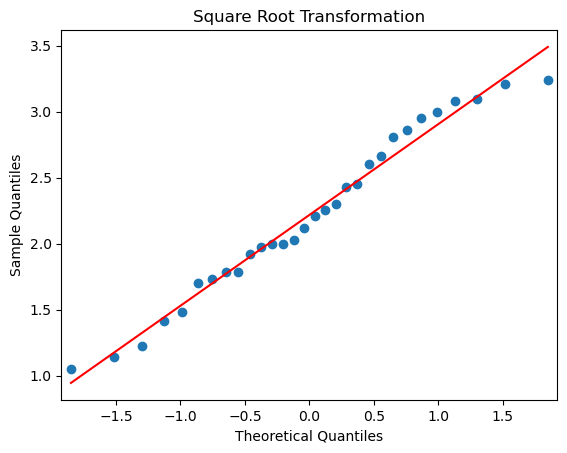

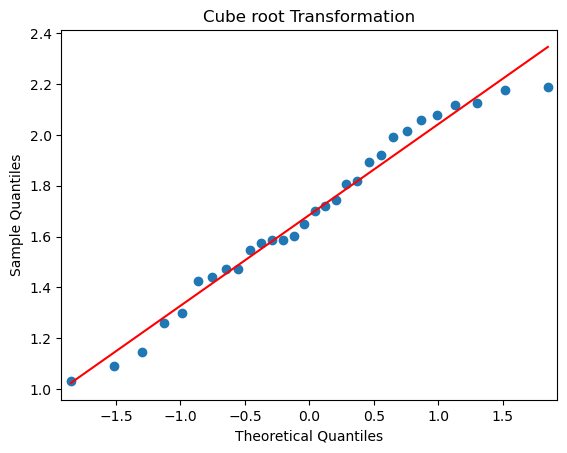

In [40]:
sm.qqplot(data['YearsExperience'],line='r')
plt.title('No Transformation')
sm.qqplot(np.log(data['YearsExperience']),line='r')
plt.title('Log Transformation')
sm.qqplot(np.sqrt(data['YearsExperience']),line='r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(data['YearsExperience']),line='r')
plt.title('Cube root Transformation')
plt.show()

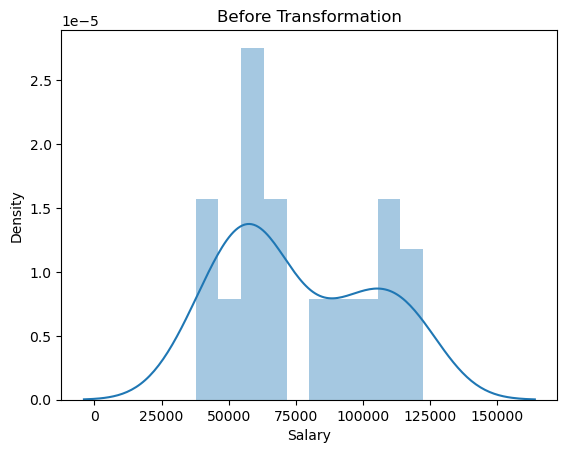

In [17]:
sns.distplot(data['Salary'],bins=10,kde=True)
plt.title('Before Transformation')
plt.show()

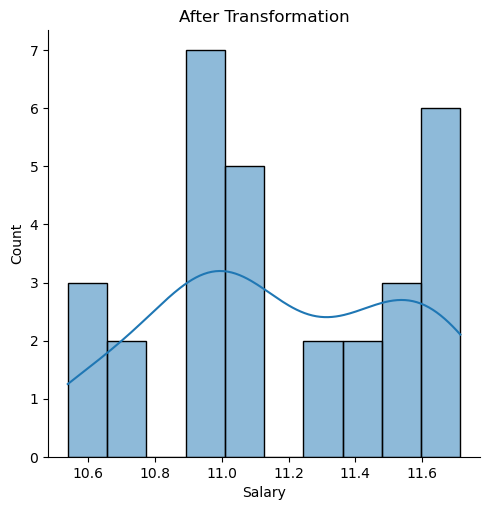

In [18]:
sns.displot(np.log(data['Salary']),bins = 10,kde = True)
plt.title('After Transformation')
plt.show()

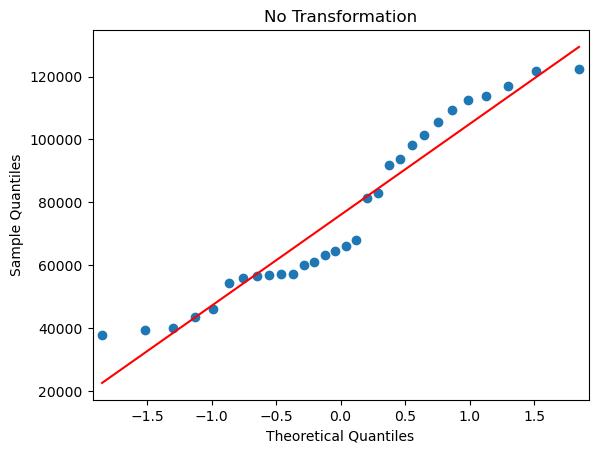

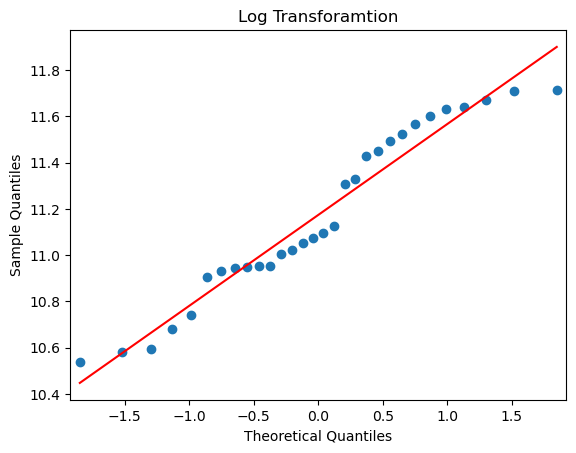

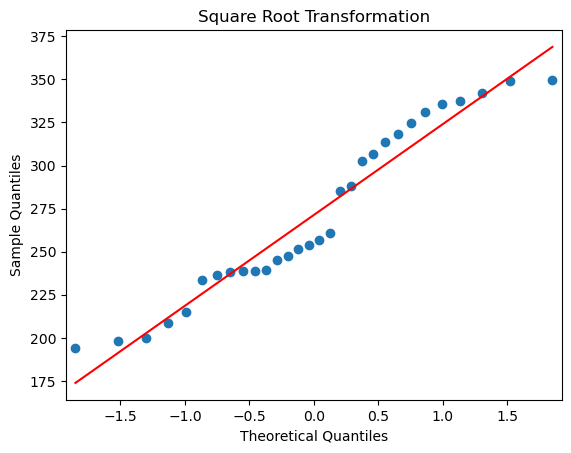

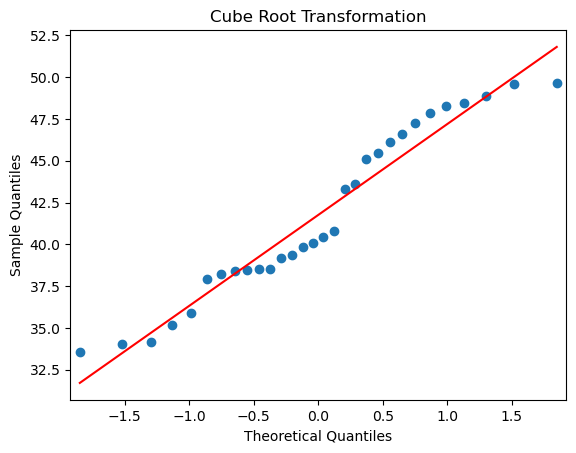

In [19]:
sm.qqplot(data['Salary'],line='r')
plt.title('No Transformation')
sm.qqplot(np.log(data['Salary']),line='r')
plt.title('Log Transforamtion')
sm.qqplot(np.sqrt(data['Salary']),line='r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(data['Salary']),line='r')
plt.title('Cube Root Transformation')
plt.show()

# Fitting a Linear Regression Model
Using ordinary least squares (OLS) regression

In [20]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

In [21]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

As you can notice in the above model
The R-squared and Adjusted R-squared scores are still below 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
Lets Try some data transformation to check whether these scores can get any higher than this.

# Square Root transformation

In [23]:
model1 = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data = data).fit()

In [24]:
model1.params

Intercept                   103.568031
np.sqrt(YearsExperience)     75.626932
dtype: float64

In [25]:
(model1.rsquared,model1.rsquared_adj)

(0.9419490138976825, 0.9398757643940283)

Adjusted R-squared scores have increased but they are still below 0.85
Lets Try other data transformation to check whether these scores can get any higher than this.

# Cube Root transformation

In [26]:
model2 = smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data = data).fit()

In [27]:
model2.params

Intercept                   16.660277
np.cbrt(YearsExperience)    14.896252
dtype: float64

In [28]:
(model2.rsquared,model2.rsquared_adj)

(0.9324434036761005, 0.9300306680931041)

# Adjusted R-squared scores have increased but they are still below 0.85
# Lets Try other data transformation to check whether these scores can get any higher than this. 

# Log transformation on Data

In [29]:
model3 = smf.ols("np.log(Salary)~np.log(YearsExperience)",data = data).fit()

In [30]:
model3.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [31]:
(model3.rsquared,model3.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

# Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

# Predicting values


In [32]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = data.YearsExperience
predicted['Salary'] = data.Salary
predicted['Predicted_Salary'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


# Predicitng from Original Model without any data transformation

In [1]:

import pandas as pd

In [3]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = data.sorting_time
predicted1['delivery_Time'] = datalivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1


NameError: name 'data' is not defined

In [35]:
(model3.rsquared,model3.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

In [36]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)